<a href="https://colab.research.google.com/github/nathanlui1/320-final-project/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Header with Contribution**


## **2. Introduction**
The introduction should motivate your work: what is your topic? What
question(s) are you trying to answer with your analysis? Why is answering those
questions important?

Understanding what leads to student success is a central question in both education research and everyday academic life. Although a student’s grade is frequently used as a marker for academic ability, it reveals only part of the story. It doesn’t show how much effort they put in or the challenges they faced. Still, grades carry a lot of weight in school and society, whether that be through future career opportunities or even peer perceptions. Since grades matter so much in school and beyond, it is important to look more closely at students’ underlying behaviors and see how they shape academic performance. In this project, we analyze a large-scale student performance dataset to investigate how different factors, such as weekly self-study hours and attendance percentage, relate to academic outcomes. Our primary goal is to answer questions such as: Which behaviors are the strongest predictors of strong academic performance? Do study habits or attendance matter more? Can we find patterns that help distinguish between high-achieving students and struggling students? By exploring these relationships, we aim to discover trends that could help students make more informed decisions about how to most effectively learn.
Answering these questions is important because these behaviors directly reflect the academic routines that real students experience, including ourselves. This analysis can guide students toward more effective study strategies, help educators understand which factors actually impact achievement, and support data-driven approaches to improving academic performance. Our project combines exploratory data analysis, hypothesis testing, and machine learning to look at what influences student outcomes and how these factors can be used to better understand and predict success.


## **3. Data Curation**
Cite the source(s) of your data. Explain what it is. Transform the data so that it is ready for analysis. For example, set up a database and use SQL to query for data, or organize a pandas DataFrame.

For this project we use the Student performance dataset.

Citation:

Qureshi, N. (n.d.). Student performance dataset. Kaggle. Retrieved September 25, 2025, from https://www.kaggle.com/datasets/nabeelqureshitiii/student-performance-dataset

This data is a simulated dataset that includes student data from exams, such as weekly self study hours, attendance percentage, class participation, total score, and other information. Below is showing the data cleaning.


In [ ]:
import pandas as pd

Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c) organize (e.g., set up a database or a pandas DataFrame)

In [ ]:
student_df = pd.read_csv('student_performance.csv')

student_df

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
...,...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0,A
999996,999997,15.7,82.7,6.7,88.3,A
999997,999998,14.2,85.1,5.8,87.9,A
999998,999999,25.3,90.0,5.3,100.0,A


In [ ]:
display(student_df.head())
print(student_df.info())

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB
None


In [ ]:
student_df = student_df.dropna()

In [ ]:
display(student_df.describe())
display(student_df['grade'].value_counts())

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


,count
grade,
A,548644
B,258174
C,141980
D,44998
F,6204


## **4. Exploratory data analysis**
(See checkpoint 2.)

In these graphs, our initial goal is to examine the distribution of students’ attendance percentages and their weekly study hours. At this stage, we are not trying to measure correlation; rather, we want to understand how the data are spread out across these two variables. We observe a strong peak at 0 hours for weekly study time and another peak at 100% for attendance.
With these distributions in mind, the next step is to explore whether attendance percentage and weekly study hours show any relationship with students' grades or total scores. Understanding the spread first helps us interpret any patterns or correlations we might find later.


### Summary statistics

Here, we calculated descriptive statistics for the numerical columns and value counts for the categorical columns.


### Data visualization

Here, we created visualizations to understand the distribution of key features and relationships between them. This will likely include histograms, box plots, and scatter plots.

Text(0.5, 1.0, 'Distribution of Total Score by Grade')

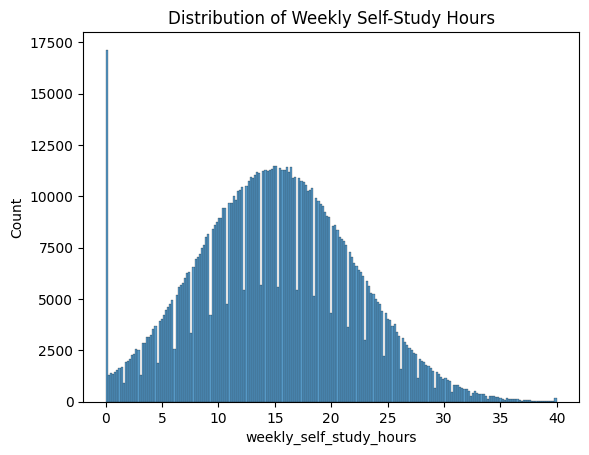

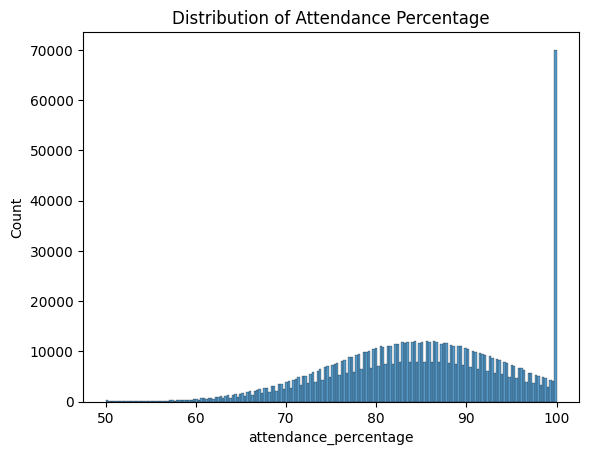

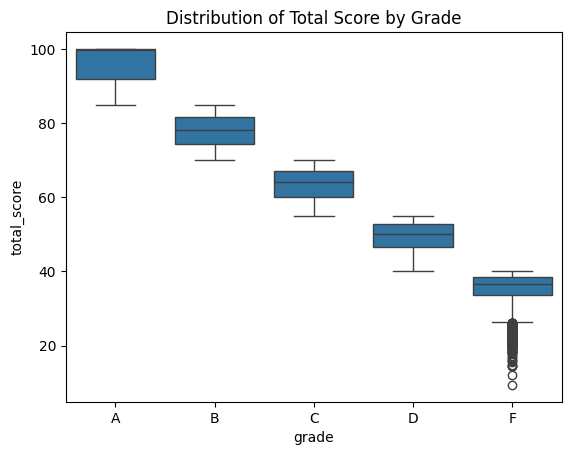

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(student_df['weekly_self_study_hours'])
plt.title('Distribution of Weekly Self-Study Hours')

plt.figure()
sns.histplot(student_df['attendance_percentage'])
plt.title('Distribution of Attendance Percentage')

plt.figure()
sns.boxplot(x='grade', y='total_score', data=student_df, order=['A', 'B', 'C', 'D', 'F'])
plt.title('Distribution of Total Score by Grade')

In these graphs, we want to first see the distribution of students in regards to attendance percentage and hours of studying per week. We are not looking for correlation but simply seeing the spread of data. There is a peak at 0 for weekly study hours and a peak at 100 for attendance percentage. With this information, we want to see if there is a correlation with attendance percentage and study hours to grades and

### Hypothesis testing

Here, we formulated and tested a hypothesis based on the data.


Hypothesis: There is a positive correlation between weekly self-study hours and total score.

Null Hypothesis (H0): There is no correlation between weekly self-study hours and total score.

Alternative Hypothesis (H1): There is a positive correlation between weekly self-study hours and total score.

Pearson correlation coefficient: 0.8122414301053575
P-value: 0.0
The p-value is less than the significance level. We reject the null hypothesis. As a result, there is a statistically significant positive correlation between weekly self-study hours and total score.


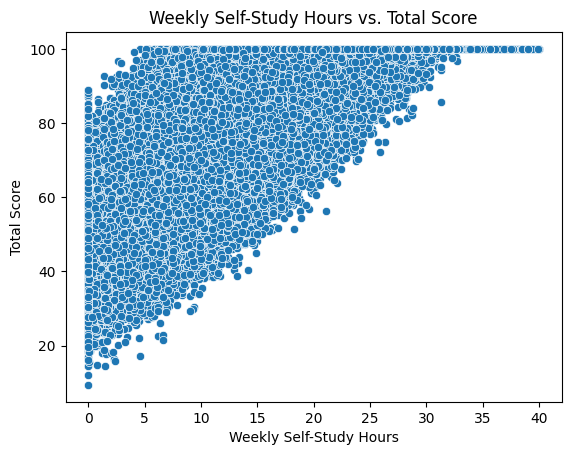

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

correlation, p_value = pearsonr(student_df['weekly_self_study_hours'], student_df['total_score'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The p-value is less than the significance level. We reject the null hypothesis. As a result, there is a statistically significant positive correlation between weekly self-study hours and total score.")
else:
    print("The p-value is greater than the significance level. We fail to reject the null hypothesis. As a result. there is no statistically significant correlation between weekly self-study hours and total score.")

plt.figure()
sns.scatterplot(x='weekly_self_study_hours', y='total_score', data=student_df)
plt.title('Weekly Self-Study Hours vs. Total Score')
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Total Score')
plt.show()

Hypothesis: There is there a positive correlation with attendance percentage and total score

Null Hypothesis (H0): Attendance percentage does not correlate with total score.

Alternative Hypothesis (H1): There is a correlation between attendance percentage and total score

Pearson correlation coefficient Attendance vs. Total Score: -0.0010138159883892669
P-value (Attendance vs. Total Score): 0.3106710451846387
The p-value is greater than the significance level (alpha). We fail to reject the null hypothesis. As a result, there is no statistically significant correlation between attendance percentage and total score.


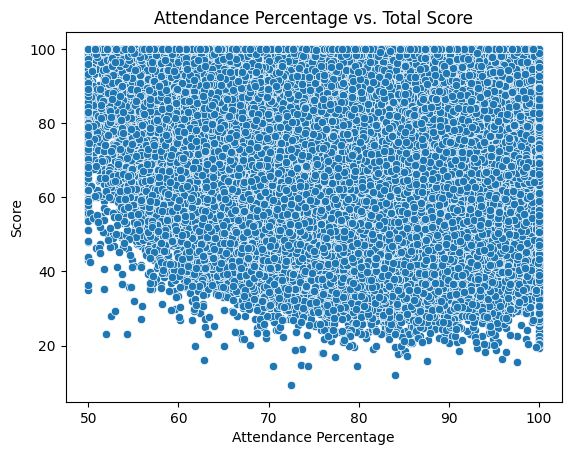

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


correlation, p_value = pearsonr(student_df['attendance_percentage'], student_df['total_score'])

print(f"Pearson correlation coefficient Attendance vs. Total Score: {correlation}")
print(f"P-value (Attendance vs. Total Score): {p_value}")

if p_value < 0.05:
    print("The p-value is less than the significance level (alpha). We reject the null hypothesis. As a result, there is a statistically significant positive correlation between attendance percentage and total score.")
else:
    print("The p-value is greater than the significance level (alpha). We fail to reject the null hypothesis. As a result, there is no statistically significant correlation between attendance percentage and total score.")

sns.scatterplot(x='attendance_percentage', y='total_score', data=student_df)
plt.title('Attendance Percentage vs. Total Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Score')
plt.show()

### Present conclusions

#### Subtask:
Summarize the findings from the exploration, summary statistics, and hypothesis testing, presenting at least three conclusions supported by the analysis and visualizations.


**Reasoning**:
Summarize the findings from the previous steps, including exploration, summary statistics, and hypothesis testing, to formulate at least three conclusions supported by the analysis and visualizations.



**Conclusion 1:** There is a positive correlation between weekly self-study hours and total scores within the data. There is a wide range of data for the weekly self-study hours ranging from 0 hours to 40 with a mean of about 15 hours. This is displayed by the graph “Distribution of Weekly Self-Study Hours. Then, using the scatterplot “Weekly Self-Study Hours vs. Total Score,” we can see that there was a clear positive trend regarding hours and score. In other words, as students did more self-study, their total scores tended to go up. We calculated the Pearson Correlation coefficient to be ~0.81, which further strengthens our positive relationship. The p-value calculated resulted in 0.0, which is less than alpha = 0.05. Therefore, we reject the null hypothesis (that there is no correlation between weekly self-study hours and total score) and conclude that there is a statistically significant positive correlation between weekly self-study hours and total score.

**Conclusion 2**: The distribution of total scores vs. grades has a mean of about 83.5 and standard deviation of about 9.9. In the box plot, we can see that high total scores are associated with high grades. The “A” students consistently have higher total scores than the “B”, the “B” students have higher total scores than “C”, and the trend continues.

**Conclusion 3**: The histogram of attendance percentage shows a wide spread, with a peak at 100 percent attendance. The scatterplot of attendance percentage vs. total score shows a very weak negative correlation, and the p-value is greater than 0.05, so the attendance levels and total_score aren’t significantly correlated at a 95% confidence level. Therefore, we fail to reject the null hypothesis (that attendance percentage and total score does not have a correlation).



## **5. Primary analysis**
Based on the results of your exploration, choose a machine learning technique (e.g., classification, regression, clustering, etc.) that will help you answer the questions you posed in the introduction. Explain your reasoning.

We chose to use multiple linear regression to help us answer the questions we posed in the introduction, as we are analyzing the relationship between a dependent variable (total score) and independent variables (self-study hours and attendance percentage). This helps us answer the questions in the intro such as: Do study habits or attendance matter more and it will tell us which behaviors are the strongest predictors of strong academic performance. Regressions are great for telling us “how much” certain inputs affect outputs which is perfect for our topic. Importantly, regressions handle continuous data, and this data contains both continuous inputs and outputs. We will be using multiple linear regression by using several inputs at the same time, to better explain and predict the outcome of the student performance.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = student_df[['weekly_self_study_hours', 'attendance_percentage']]
y = student_df['total_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 score is ",r2)
print("MSE is", mse)

coefficients = pd.DataFrame({'Predictor': X.columns,'Coefficient': model.coef_})
print("\nRegression Coefficients:\n", coefficients)
print("\nIntercept:", model.intercept_)

R2 score is  0.6599428417851751
MSE is 80.93527340188224

Regression Coefficients:
                  Predictor  Coefficient
0  weekly_self_study_hours     1.816171
1    attendance_percentage    -0.000100

Intercept: 56.99783496959708


## **6. Visualization**
Explain the results and insights of your primary analysis with at least one plot. Make sure that every element of the plots are labeled and explained (don’t forget to include a legend!).

We were debating on whether or not to have an intercept, as it made the data look strange with a line at around 57, so none of the predicted values were below 57. However, when we tried to remove it, it made the R2 value lower. As a result,  we determined our model would be more accurate with an intercept.

**NOT FINISHED**

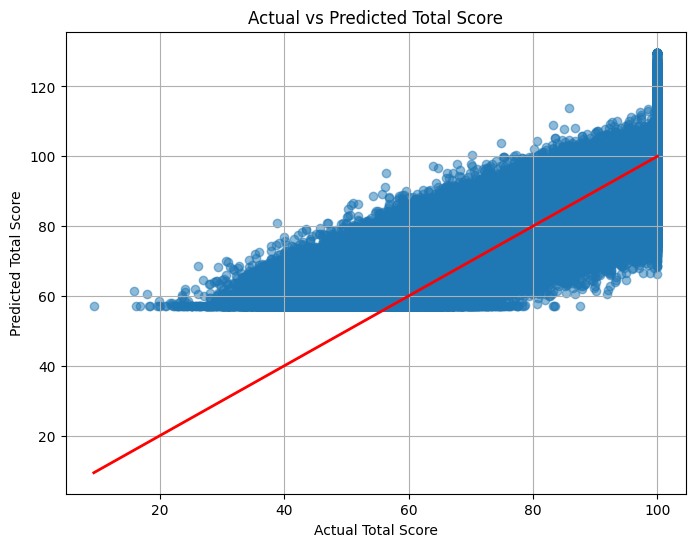

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)

plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Total Score")
plt.grid(True)
plt.show()

## **7. Insights and Conclusions**
After reading through the project, does an uninformed reader feel informed about the topic? Would a reader who already knew about the topic feel like they learned more about it?

Through our analysis, we found evidence that certain student behaviors influence academic performance, while others do not have a very significant role. Our exploration and hypothesis testing demonstrated that weekly self-study hours show a strong, statistically significant correlation with total score, suggesting that consistent independent study is one of the most impactful predictors of success. Meanwhile, attendance percentage, which is often assumed to be important, showed no correlation with performance in this dataset. Our machine learning results further supported these findings, highlighting that self-study hours is the strongest contributor to predictive models of student scores and grades. These insights provide a perspective through data that show which habits might genuinely help students perform better.

After reading through the project, an uninformed reader is able to gain a clearer understanding of which factors between weekly self-study hours and attendance percentage have a significant impact on academic scores, supported by visualizations, statistical tests, and predictive modeling. A reader who is already familiar with student performance research may still find value in the scale of the dataset, the strength of the correlations, and the consistency between exploratory analysis and machine learning results. By combining multiple analytic approaches, our project answers the original questions and provides a deeper context and view of how student effort translates into measurable academic achievement.
